In [3]:
# Limpieza y procesamiento de datos

- Corrección formato países
- Adecuar las columnas con valores nulos

SyntaxError: invalid syntax (3013574351.py, line 3)

In [7]:
import pandas as pd
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,10112,Los aristogatos,The Aristocats,['United States of America'],1910. En París una anciana millonaria y excént...,Una extravagancia animada llena de melodías.,1970-12-24,en,"Animación, Comedia, Familia, Aventura",78,4000000,191000000,"['Phil Harris', 'Eva Gabor', 'Sterling Holloway']",7.287,Wolfgang Reitherman,"['paris, france', 'return', 'butler', 'cartoon..."
1,1685,Regreso al planeta de los simios,Beneath the Planet of the Apes,['United States of America'],Una nueva nave procedente del espacio y del ti...,"El extraño mundo de ""El planeta de los simios""...",1970-04-23,en,"Aventura, Ciencia ficción, Misterio",95,3000000,18999718,"['James Franciscus', 'Kim Hunter', 'Maurice Ev...",6.147,Ted Post,"['dystopia', 'mutant', 'distant future', 'astr..."
2,9062,Love Story,Love Story,['United States of America'],Historia de amor de dos universitarios de Harv...,Amor significa no tener que pedir perdón.,1970-12-16,en,"Romance, Drama",99,2200000,136400000,"['Ali MacGraw', ""Ryan O'Neal"", 'John Marley']",6.821,Arthur Hiller,"['based on novel or book', 'harvard university..."
3,11202,Patton,Patton,['United States of America'],Biografía del general norteamericano George S....,El guerrero rebelde.,1970-01-25,en,"Bélica, Drama, Historia",172,12000000,89800000,"['George C. Scott', 'Stephen Young', 'Frank La...",7.487,Franklin J. Schaffner,"['general', 'steel helmet', 'allies', 'world w..."
4,42589,"Hola, mamá","Hi, Mom!",['United States of America'],"John Rubin, un veterano de la guerra del Vietn...",NaN,1970-04-27,en,"Comedia, Crimen",88,0,0,"['Robert De Niro', 'Jennifer Salt', 'Allen Gar...",6.293,Brian De Palma,"['new york city', 'pornography', 'black panthe..."


In [11]:
# Lista actual de países únicos

paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Australia'", "'Australia']", "'Belgium'", "'Brazil'", "'Brazil']", "'Canada'", "'Canada']", "'China'", "'Colombia'", "'Cyprus']", "'Czech Republic']", "'Denmark'", "'Ecuador'", "'Finland'", "'Finland']", "'France'", "'France']", "'Germany'", "'Germany']", "'Hong Kong'", "'Hong Kong']", "'Ireland']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Liechtenstein'", "'Luxembourg']", "'Mexico'", "'Mexico']", "'Morocco'", "'Netherlands']", "'New Zealand'", "'Norway'", "'Peru'", "'Poland'", "'Poland']", "'Puerto Rico']", "'Romania'", "'Romania']", "'South Africa']", "'Soviet Union'", "'Soviet Union']", "'Spain'", "'Spain']", "'Sweden'", "'Sweden']", "'Switzerland'", "'Taiwan']", "'Thailand']", "'Tunisia']", "'Turkey']", "'United Arab Emirates'", "'United Kingdom'", "'United Kingdom']", "'United States of America'", "'United States of America']", "'Yugoslavia']", "['Argentina'", "['Argentina']", "['Australia'", "['Australia']", "['Austria'", "['Belgium'", "['Brazil'", "['Bulgaria'", "['Can

In [17]:
# Limpieza de países

import ast

def normalizar_paises(valor):
    try:
        lista = ast.literal_eval(valor)
        if isinstance(lista, list):
            return [pais.strip().strip("'").strip('"') for pais in lista if pais]
    except (ValueError, SyntaxError):
        return []
    return []

df["production_countries"] = df["production_countries"].fillna("[]")
df["production_countries"] = df["production_countries"].apply(normalizar_paises)

df["main_country"] = df["production_countries"].apply(lambda x: x[0] if x else None)

In [27]:
#Mostramos la lista actualizada de países

paises_unicos = set()
for entry in df["production_countries"].dropna():
    for pais in entry: 
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'East Germany', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein', 'Luxembourg', 'Mexico', 'Mongolia', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Singapore', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Yugoslavia']


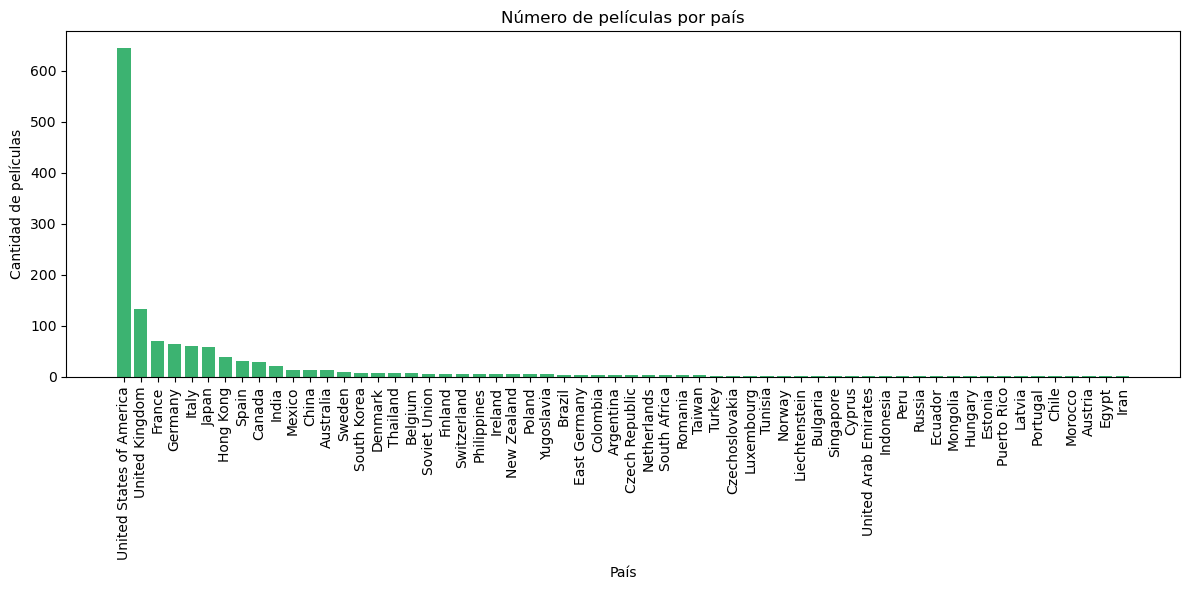

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

all_countries = []
for entry in df["production_countries"].dropna():
    all_countries.extend([pais.strip() for pais in entry])

country_counts = Counter(all_countries)

df_countries = pd.DataFrame(country_counts.items(), columns=["País", "Películas"])
df_countries = df_countries.sort_values("Películas", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_countries["País"], df_countries["Películas"], color="mediumseagreen")
plt.xticks(rotation=90)
plt.title("Número de películas por país")
plt.ylabel("Cantidad de películas")
plt.xlabel("País")
plt.tight_layout()
plt.show()
           
    

In [31]:
df_countries.head(15)

,País,Películas
0,United States of America,645
6,United Kingdom,133
4,France,71
5,Germany,64
1,Italy,61
3,Japan,59
15,Hong Kong,40
9,Spain,31
27,Canada,29
13,India,21


In [33]:
# Solución a los valores nulos

df.isnull().mean().sort_values(ascending=False)

tagline                 0.637
overview                0.143
main_country            0.006
director                0.002
genres                  0.002
production_countries    0.000
release_date            0.000
original_language       0.000
title                   0.000
runtime                 0.000
budget                  0.000
revenue                 0.000
cast                    0.000
vote_average            0.000
original_title          0.000
keywords                0.000
id                      0.000
dtype: float64

In [35]:
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline         63.7
overview        14.3
main_country     0.6
director         0.2
genres           0.2
dtype: float64

In [41]:
# Tagline tiene un porcentaje muy alto de nulos. Es mejor prescindir de esta columna.
# Overview es importante, rellenaremos los huecos.
# Main_country y director tienen muy bajo porcentaje nulo, también lo rellenaremos.
# Con Genres hay que asegurarse de que todos los valores sean listas válidas. 

In [43]:
# Tagline
df.drop(columns=["tagline"], inplace=True)

df.isnull().mean().sort_values(ascending=False)


overview                0.143
main_country            0.006
genres                  0.002
director                0.002
id                      0.000
title                   0.000
original_title          0.000
production_countries    0.000
release_date            0.000
original_language       0.000
runtime                 0.000
budget                  0.000
revenue                 0.000
cast                    0.000
vote_average            0.000
keywords                0.000
dtype: float64

In [45]:
# Overview

df["overview"] = df["overview"].fillna("Sin descripción disponible.")

df.isnull().mean().sort_values(ascending=False)

main_country            0.006
genres                  0.002
director                0.002
id                      0.000
title                   0.000
original_title          0.000
production_countries    0.000
overview                0.000
release_date            0.000
original_language       0.000
runtime                 0.000
budget                  0.000
revenue                 0.000
cast                    0.000
vote_average            0.000
keywords                0.000
dtype: float64

In [47]:
# main_country

df["main_country"] = df["main_country"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.002
director                0.002
id                      0.000
title                   0.000
original_title          0.000
production_countries    0.000
overview                0.000
release_date            0.000
original_language       0.000
runtime                 0.000
budget                  0.000
revenue                 0.000
cast                    0.000
vote_average            0.000
keywords                0.000
main_country            0.000
dtype: float64

In [49]:
# director

df["director"] = df["director"].fillna("Unknown")

df.isnull().mean().sort_values(ascending=False)

genres                  0.002
id                      0.000
title                   0.000
original_title          0.000
production_countries    0.000
overview                0.000
release_date            0.000
original_language       0.000
runtime                 0.000
budget                  0.000
revenue                 0.000
cast                    0.000
vote_average            0.000
director                0.000
keywords                0.000
main_country            0.000
dtype: float64

In [63]:
df["genres"] = df["genres"].apply(lambda x: x if isinstance(x, list) else [])

df.isnull().mean().sort_values(ascending=False)

id                      0.0
title                   0.0
original_title          0.0
production_countries    0.0
overview                0.0
release_date            0.0
original_language       0.0
genres                  0.0
runtime                 0.0
budget                  0.0
revenue                 0.0
cast                    0.0
vote_average            0.0
director                0.0
keywords                0.0
main_country            0.0
dtype: float64

In [61]:
# Guardamos progreso
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/movies_paso1_limpieza.csv", index=False)

In [67]:
# Normalización de los nombres de director

df = pd.read_csv('../notebooks/data/movies_paso1_limpieza.csv')

directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Gordon Douglas         7
Akira Kurosawa         4
Anthony Mann           4
John Sturges           3
Jesús Franco           3
                      ..
Chris Wedge            1
Andrew Niccol          1
Ang Lee                1
Darren Lynn Bousman    1
Zhang Yimou            1
Name: count, Length: 859, dtype: int64 

['Aaron Norris', 'Abbas Kiarostami', 'Abel Ferrara', 'Abraham Polonsky', 'Adam Elliot', 'Adam Rehmeier', 'Adam Shankman', 'Adam Simon', 'Adam Stern', 'Adam Wingard', 'Adil El Arbi', 'Adrian Lyne', 'Agnieszka Holland', 'Aki Kaurismäki', 'Akira Kurosawa', 'Alain Robbe-Grillet', 'Alan J. Pakula', 'Alan Le May', 'Alan Mak Siu-Fai', 'Albert Pyun', 'Alberto Bevilacqua', 'Alejandro Jodorowsky', 'Alessandro Genovesi', 'Alex Garland', 'Alexander Hall', 'Alexandre de La Patellière', 'Alfred E. Green', 'Alfred Hitchcock', 'Allan Dwan', 'Allan Moyle', 'Allen Kool', 'Alvin Rakoff', 'Amy Heckerling', 'Andrew Adamson', 'Andrew Bergman', 'Andrew Douglas', 'Andrew Niccol', 'Andrew V.

In [69]:
correcciones_directores = {
    'Alan Mak Siu-Fai': 'Alan Mak',
    'Benny Chan Muk-Sing': 'Benny Chan',
    'Corey Yuen Kwai': 'Corey Yuen',
    'Jess Franco': 'Jesús Franco',
    'Joseph L. Mankiewicz': 'Joseph Mankiewicz'
}
df['director'] = df['director'].replace(correcciones_directores)
    

In [73]:
directores = df['director'].value_counts(dropna=False)
print(directores,"\n")

directores_unicos = set()

for entry in df["director"].dropna():
    for director in entry.split(","):
        directores_unicos.add(director.strip())

print(sorted(directores_unicos))

director
Gordon Douglas         7
Akira Kurosawa         4
Anthony Mann           4
John Sturges           3
Jesús Franco           3
                      ..
Chris Wedge            1
Andrew Niccol          1
Ang Lee                1
Darren Lynn Bousman    1
Zhang Yimou            1
Name: count, Length: 859, dtype: int64 

['Aaron Norris', 'Abbas Kiarostami', 'Abel Ferrara', 'Abraham Polonsky', 'Adam Elliot', 'Adam Rehmeier', 'Adam Shankman', 'Adam Simon', 'Adam Stern', 'Adam Wingard', 'Adil El Arbi', 'Adrian Lyne', 'Agnieszka Holland', 'Aki Kaurismäki', 'Akira Kurosawa', 'Alain Robbe-Grillet', 'Alan J. Pakula', 'Alan Le May', 'Alan Mak', 'Albert Pyun', 'Alberto Bevilacqua', 'Alejandro Jodorowsky', 'Alessandro Genovesi', 'Alex Garland', 'Alexander Hall', 'Alexandre de La Patellière', 'Alfred E. Green', 'Alfred Hitchcock', 'Allan Dwan', 'Allan Moyle', 'Allen Kool', 'Alvin Rakoff', 'Amy Heckerling', 'Andrew Adamson', 'Andrew Bergman', 'Andrew Douglas', 'Andrew Niccol', 'Andrew V. McLagle

In [75]:
# Guardamos 
df.to_csv("data/movies_limpios.csv", index=False)